In [1]:
#  twitter sentiment analyser using python

In [36]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [37]:
# twitter api credentials
consumerkey =""# enter your api key
consumerSecret = "" # enter your api secret 
accessToken = "" # enter your accessToken key
accessTokenSecret= "" # enter your access Token secret 

In [38]:
# Create Auth object
authenticate= tweepy.OAuthHandler(consumerkey,consumerSecret)

#set access token and acaccessTokenSecret
authenticate.set_access_token(accessToken,accessTokenSecret)

# create api object whiile passing auth info

api = tweepy.API(authenticate,wait_on_rate_limit= True)


In [49]:
# extract 100 tweets from user
posts = api.user_timeline(screen_name="NarendraModi",count=100,tweet_mode="extended")

# print last 5 tweets from account
print("show the 5 recent tweets :\n")
i=1
for tweet in posts[0:5]:
    print(str(i)+')' '  '+tweet.full_text + "\n")
    i=i+1

show the 5 recent tweets :

1)  Deeply shocked and saddened to learn about the crash of the passenger flight MU5735 with 132 on board in China’s Guangxi. Our thoughts and prayers are with the victims of the crash and their family members.

2)  Congratulations to Shri @NBirenSingh Ji on being sworn-in as the Chief Minister of Manipur. I am confident his team and he would take Manipur to newer heights of progress and continue the good work done in the last five years.

3)  My remarks at the India-Australia virtual summit with PM @ScottMorrisonMP https://t.co/TLBmappqgI

4)  We mark Navroz with a prayer that the coming year brings with it joy and outstanding health in everyone’s lives. May all aspirations be fulfilled and may there be prosperity all around. 

Navroz Mubarak!

5)  Proud of you @lakshya_sen! You’ve shown remarkable grit and tenacity. You put up a spirited fight. Best wishes for your future endeavours. I am confident you will keep scaling new heights of success.



In [50]:
#  Create a dataframe with column called Tweets
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

df.head()

,Tweets
0,Deeply shocked and saddened to learn about the...
1,Congratulations to Shri @NBirenSingh Ji on bei...
2,My remarks at the India-Australia virtual summ...
3,We mark Navroz with a prayer that the coming y...
4,Proud of you @lakshya_sen! You’ve shown remark...


In [51]:
# clean the text

def cleantxt(text):
    text=re.sub(r"@[A-Za-z0-9]+","",text) #removes @
    text=re.sub(r"#","",text) #removes #
    text=re.sub(r"RT[\s]+","",text) #removes RT
    text=re.sub(r"https?:\/\/\S+","",text) #removes hyperlinks
    return text

df['Tweets']=df['Tweets'].apply(cleantxt)

df.head()

,Tweets
0,Deeply shocked and saddened to learn about the...
1,Congratulations to Shri Ji on being sworn-in ...
2,My remarks at the India-Australia virtual summ...
3,We mark Navroz with a prayer that the coming y...
4,Proud of you _sen! You’ve shown remarkable gri...


In [53]:
df['Tweets'][2]

'My remarks at the India-Australia virtual summit with PM  '

In [54]:
# function to get subjectivity 
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# function to get polarity 
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

# create 2 new columns

df['subjectivity']= df['Tweets'].apply(getsubjectivity)
df['polarity']=df['Tweets'].apply(getpolarity)

df.head()
    


,Tweets,subjectivity,polarity
0,Deeply shocked and saddened to learn about the...,0.80000,-0.700000
1,Congratulations to Shri Ji on being sworn-in ...,0.50000,0.400000
2,My remarks at the India-Australia virtual summ...,0.00000,0.000000
3,We mark Navroz with a prayer that the coming y...,0.53750,0.712500
4,Proud of you _sen! You’ve shown remarkable gri...,0.55786,0.523295


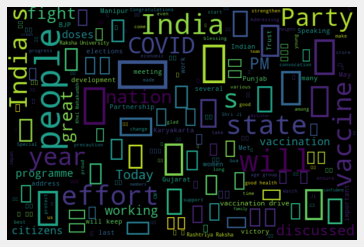

In [55]:
# plot the word cloud 
allwords = ''.join([twts for twts in df['Tweets']])
wordcloud = WordCloud(width=600,height=400,random_state=20,max_font_size=119).generate(allwords)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [56]:
# classify the tweets as positive, neutral, negative

def getanalysis(score):
    if score <0 :
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else :
        return 'Positive'

df['Analysis']=df['polarity'].apply(getanalysis)

# df[df['Analysis']=='Neutral']
df

,Tweets,subjectivity,polarity,Analysis
0,Deeply shocked and saddened to learn about the...,0.800000,-0.700000,Negative
1,Congratulations to Shri Ji on being sworn-in ...,0.500000,0.400000,Positive
2,My remarks at the India-Australia virtual summ...,0.000000,0.000000,Neutral
3,We mark Navroz with a prayer that the coming y...,0.537500,0.712500,Positive
4,Proud of you _sen! You’ve shown remarkable gri...,0.557860,0.523295,Positive
...,...,...,...,...
95,": On the occasion of IWD2022, in partnership ...",0.000000,0.000000,Neutral
96,Speaking at a webinar on ‘Financing for Growth...,0.000000,0.000000,Neutral
97,"During the various MannKiBaat episodes, we hav...",0.712500,0.212500,Positive
98,Furthering women empowerment in different sphe...,0.600000,0.000000,Neutral


In [57]:
# printing all positive tweets
j=1
sortedDF=df.sort_values(by=['polarity'])
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=="Positive":
        print(str(j)+ ') '+ sortedDF['Tweets'][i])
        print()
        j=j+1



1) Congratulations to Shri  Ji on being sworn-in as the Chief Minister of Manipur. I am confident his team and he would take Manipur to newer heights of progress and continue the good work done in the last five years.

2) We mark Navroz with a prayer that the coming year brings with it joy and outstanding health in everyone’s lives. May all aspirations be fulfilled and may there be prosperity all around. 

Navroz Mubarak!

3) Proud of you _sen! You’ve shown remarkable grit and tenacity. You put up a spirited fight. Best wishes for your future endeavours. I am confident you will keep scaling new heights of success.

4) Some of the other subjects that were discussed during the talks with PM  included climate change, clean energy, infrastructure development and cultural cooperation. We also met business leaders earlier in the day.

5) Economic ties between India and Japan are getting more robust. Japan is among the top investors in India. Based on the trend of the last few years, we are a

In [58]:
# printing all negative tweets
j=1
sortedDF=df.sort_values(by=['polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=="Negative":
        print(str(j)+ ') '+ sortedDF['Tweets'][i])
        print()
        j=j+1


1) Deeply shocked and saddened to learn about the crash of the passenger flight MU5735 with 132 on board in China’s Guangxi. Our thoughts and prayers are with the victims of the crash and their family members.

2) Speaking at the Valedictory Function of 96th Common Foundation Course at LBSNAA. 

3) Met Shri  Ji and congratulated him on ’s stupendous victory in the recently concluded Assembly Polls. Our Party is committed to working even harder to fulfil the aspirations of the people of Manipur. 

4) Over the last year, India’s vaccination drive has been people powered. Unlike other nations where we are witnessing a lot of vaccine hesitancy, people here have not only taken their doses but also urged others to get vaccinated as soon as possible. This is heartening to see.

5) सफलता का मंत्र है- Long Term Planning और Continuous Commitment. 

6) I am humbled by the people’s affection. This support and enthusiasm inspires us to work even harder in service of our citizens. 



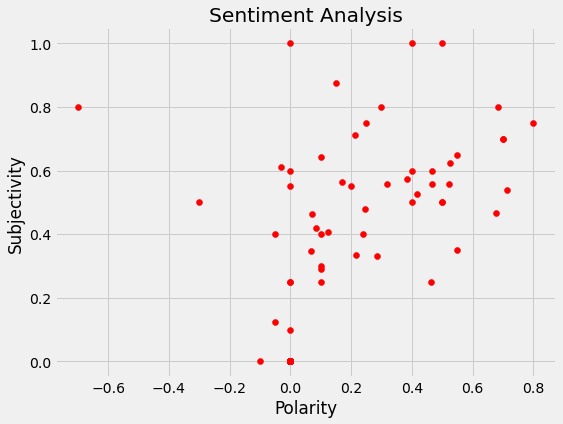

In [59]:
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
plt.scatter(df['polarity'],df['subjectivity'],color='red')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [61]:
#  show the value counts
df['Analysis'].value_counts()


Neutral     53
Positive    41
Negative     6
Name: Analysis, dtype: int64

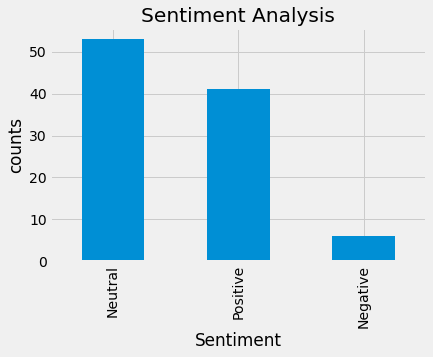

In [62]:
#  Visualizing the counts
plt.title('Sentiment Analysis')
plt.ylabel('counts')
plt.xlabel('Sentiment')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()